In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

#SQL:
from sqlalchemy import create_engine

# Distance calculation
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
#1. Loading & Preview the Data:

In [ ]:
df = pd.read_csv("telcom_data.csv")
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,04-04-2019 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164570000000000,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,04-09-2019 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,04-09-2019 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,04-10-2019 00:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,04-12-2019 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [ ]:
# Compute top 10 handset types by count
top_10_handsets = (
    df['Handset Type']
    .value_counts()
    .head(10)
    .reset_index()
)

top_10_handsets.columns = ['Handset Type', 'Number of Users']
top_10_handsets

,Handset Type,Number of Users
0,Huawei B528S-23A,19752
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,undefined,8987
4,Apple iPhone 7 (A1778),6326
5,Apple iPhone Se (A1723),5187
6,Apple iPhone 8 (A1905),4993
7,Apple iPhone Xr (A2105),4568
8,Samsung Galaxy S8 (Sm-G950F),4520
9,Apple iPhone X (A1901),3813


In [ ]:
# Top 3 handset manufacturers by number of users
top_3_manufacturers = (
    df['Handset Manufacturer']
    .value_counts()
    .head(3)
    .reset_index()
)

top_3_manufacturers.columns = ['Handset Manufacturer', 'Number of Users']
top_3_manufacturers

,Handset Manufacturer,Number of Users
0,Apple,59565
1,Samsung,40839
2,Huawei,34423


In [ ]:
# For each top manufacturer, get its top 5 handset types by count
for manu in top_3_manufacturers.index:
    print(f"\nTop 5 handsets for {manu}")
    print(df[df['Handset Manufacturer'] == manu]['Handset Type']
          .value_counts().head(5))


Top 5 handsets for 0
Series([], Name: count, dtype: int64)

Top 5 handsets for 1
Series([], Name: count, dtype: int64)

Top 5 handsets for 2
Series([], Name: count, dtype: int64)


In [ ]:
# Aggregate per user per application
df['Social_Media_Total'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Google_Total'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Email_Total'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Youtube_Total'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Netflix_Total'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Gaming_Total'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Other_Total'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

df['Total_Data_Volume'] = (
    df[['Social_Media_Total','Google_Total','Email_Total',
        'Youtube_Total','Netflix_Total','Gaming_Total','Other_Total']]
    .sum(axis=1)
)

In [ ]:
#NON-GRAPHICAL UNIVARIATE ANALYSIS

univariate_stats = df[['Total_Data_Volume','Dur. (ms)']].describe().T
univariate_stats

,count,mean,std,min,25%,50%,75%,max
Total_Data_Volume,150001.0,9.168652e+08,3.442942e+08,58362293.0,669968638.0,917059649.0,1.164283e+09,1.780674e+09
Dur. (ms),150000.0,1.046086e+05,8.103762e+04,7142.0,57440.5,86399.0,1.324302e+05,1.859336e+06


In [ ]:
#BASIC DATA INSPECTION

print("Shape of dataset:", df.shape)

# Data types & non-null counts
df.info()

# Statistical summary (numerical)
df.describe()

Shape of dataset: (150001, 63)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  ob

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Total UL (Bytes),Total DL (Bytes),Social_Media_Total,Google_Total,Email_Total,Youtube_Total,Netflix_Total,Gaming_Total,Other_Total,Total_Data_Volume
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500000e+05,1.500000e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.012558e+19,499.188200,498.800880,1.046086e+05,2.082017e+14,4.188282e+10,4.847454e+13,109.795706,17.662883,13300.045927,...,4.112121e+07,4.546434e+08,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08,4.293653e+08,9.168652e+08
std,2.878624e+18,288.611834,288.097653,8.103762e+04,2.149286e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,1.127639e+07,2.441429e+08,1.035646e+06,3.516420e+06,1.071109e+06,9.246800e+06,9.260820e+06,2.440199e+08,2.432681e+08,3.442942e+08
min,6.917540e+18,0.000000,0.000000,7.142000e+03,2.040470e+14,3.360100e+10,4.400150e+11,0.000000,0.000000,0.000000,...,2.866892e+06,7.114041e+06,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05,1.490450e+05,5.836229e+07
25%,7.350000e+18,250.000000,251.000000,5.744050e+04,2.082010e+14,3.365130e+10,3.546070e+13,32.000000,2.000000,43.000000,...,3.322201e+07,2.431068e+08,9.322180e+05,4.943599e+06,1.359344e+06,1.599846e+07,1.597946e+07,2.187279e+08,2.185534e+08,6.699686e+08
50%,7.350000e+18,499.000000,500.000000,8.639900e+04,2.082020e+14,3.366371e+10,3.572200e+13,45.000000,5.000000,63.000000,...,4.114331e+07,4.558411e+08,1.826471e+06,7.812835e+06,2.263567e+06,2.266177e+07,2.263554e+07,4.316150e+08,4.299865e+08,9.170596e+08
75%,1.300000e+19,749.000000,750.000000,1.324302e+05,2.082020e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,4.903424e+07,6.657055e+08,2.727487e+06,1.068280e+07,3.159818e+06,2.929260e+07,2.929044e+07,6.414159e+08,6.399275e+08,1.164283e+09
max,1.320000e+19,999.000000,999.000000,1.859336e+06,2.140740e+14,8.823970e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,7.833131e+07,9.029696e+08,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08,1.780674e+09


In [ ]:
df.isna().sum()

Bearer Id            991
Start                  1
Start ms               1
End                    1
End ms                 1
                    ... 
Youtube_Total          0
Netflix_Total          0
Gaming_Total           0
Other_Total            0
Total_Data_Volume      0
Length: 63, dtype: int64

In [ ]:
#MISSING VALUE TREATMENT
missing_percent = (df.isnull().sum()/len(df)) *100
missing_percent.sort_values(ascending=False).head(10)

Nb of sec with 37500B < Vol UL              86.835421
Nb of sec with 6250B < Vol UL < 37500B      74.561503
Nb of sec with 125000B < Vol DL             65.024900
TCP UL Retrans. Vol (Bytes)                 64.432237
Nb of sec with 31250B < Vol DL < 125000B    62.390251
Nb of sec with 1250B < Vol UL < 6250B       61.928920
Nb of sec with 6250B < Vol DL < 31250B      58.877607
TCP DL Retrans. Vol (Bytes)                 58.763608
HTTP UL (Bytes)                             54.539636
HTTP DL (Bytes)                             54.315638
dtype: float64

In [ ]:
#Replace missing numeric values with mean:-
for col in df.select_dtypes(include=np.number):
    df[col].fillna(df[col].mean())

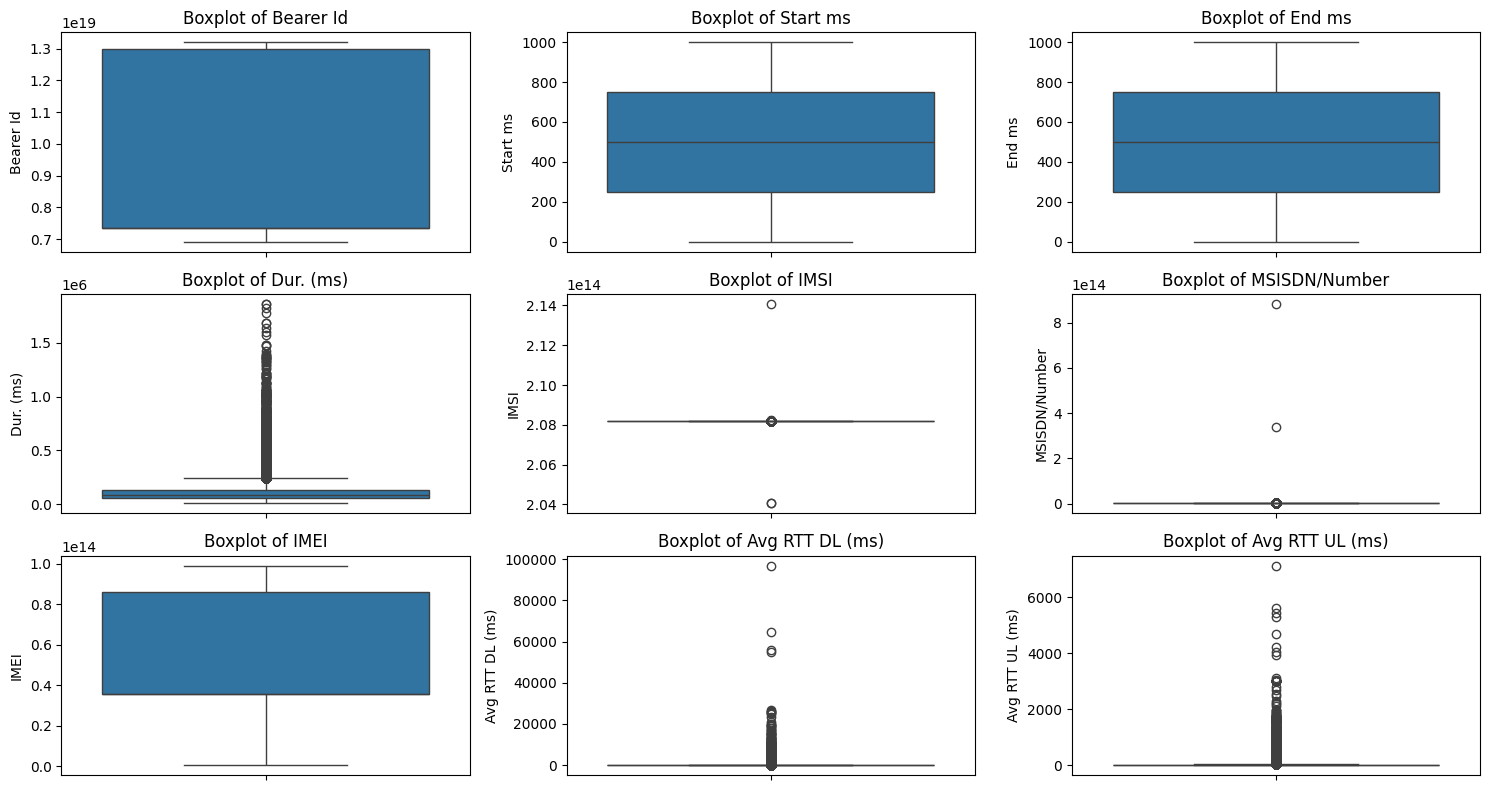

In [ ]:
# VISUAL OUTLIER DETECTION (BEFORE):-

numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15,8))

for i, col in enumerate(numeric_cols[:9], 1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# OUTLIER TREATMENT USING IQR:-

def iqr_outlier_treatment(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return np.where(series < lower, series.mean(),
    np.where(series > upper, series.mean(), series))

for col in numeric_cols:
    df[col] = iqr_outlier_treatment(df[col])

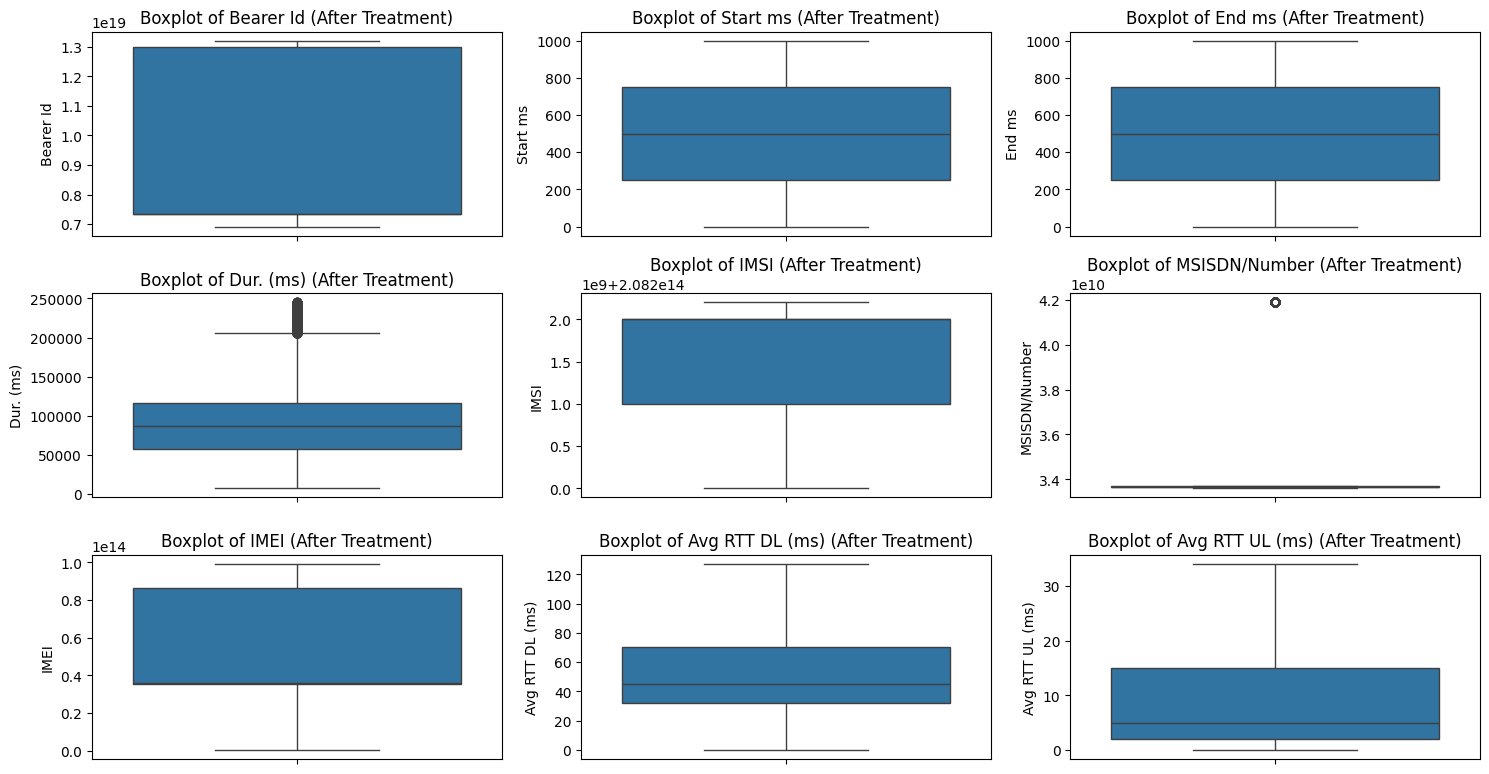

In [ ]:
# VISUAL OUTLIER CHECK (AFTER):-

plt.figure(figsize=(15,8))

max_plots = 9
for i, col in enumerate(numeric_cols[:max_plots], 1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (After Treatment)')

plt.tight_layout()
plt.show()

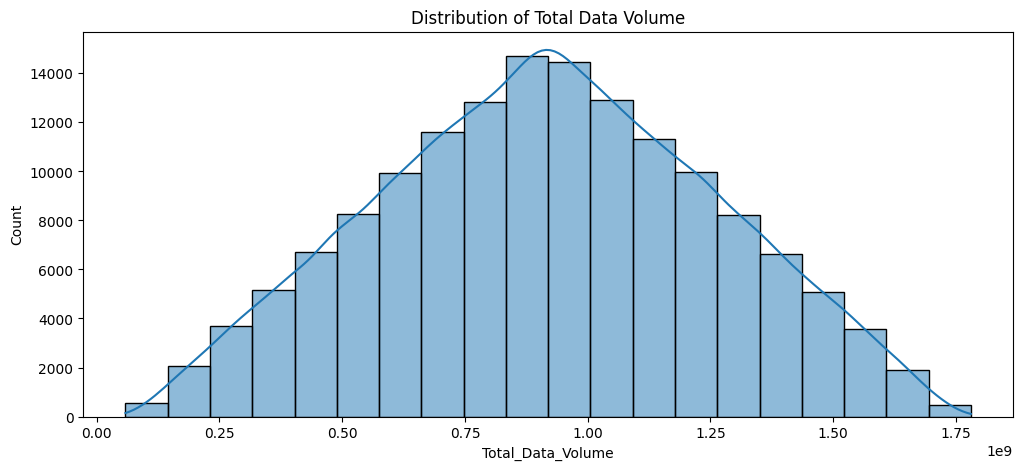

In [ ]:
#GRAPHICAL UNIVARIATE ANALYSIS:-

plt.figure(figsize=(12,5))
sns.histplot(df['Total_Data_Volume'], bins=20, kde=True)
plt.title("Distribution of Total Data Volume")
plt.show()

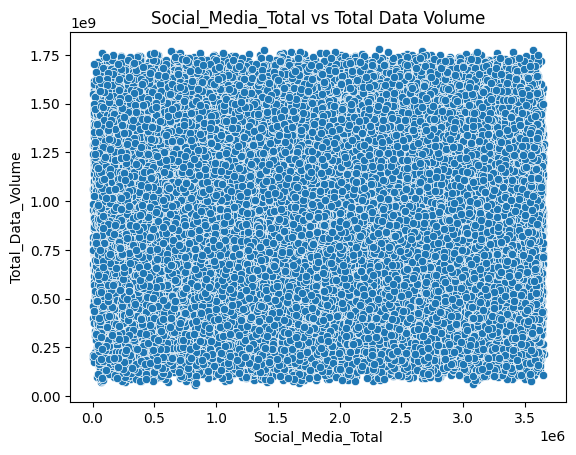

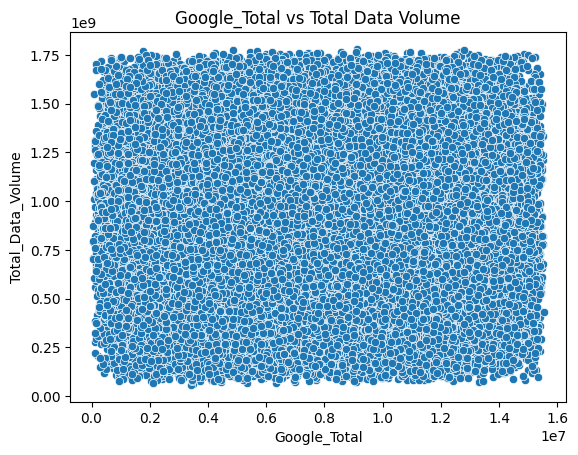

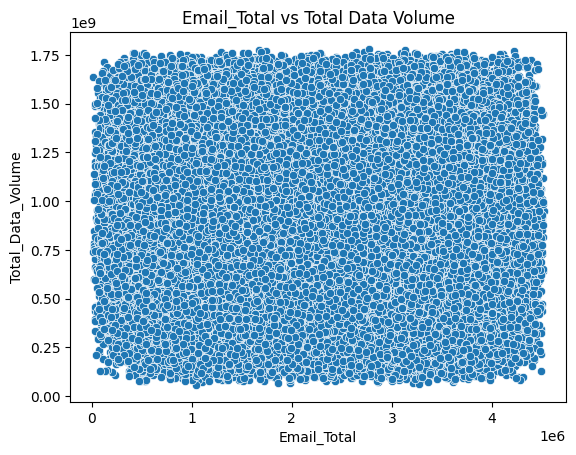

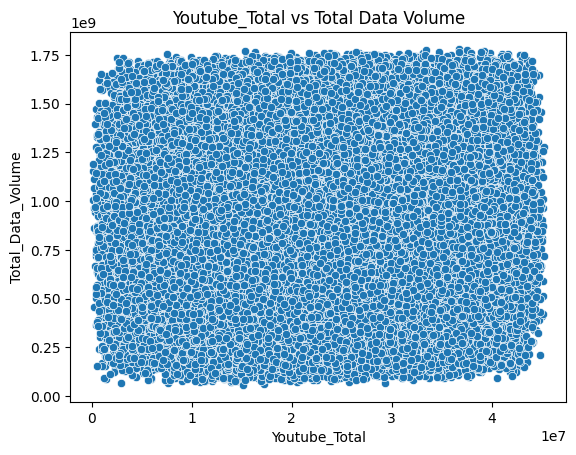

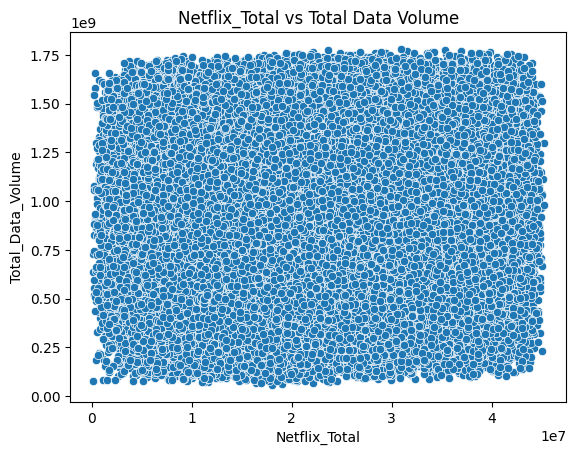

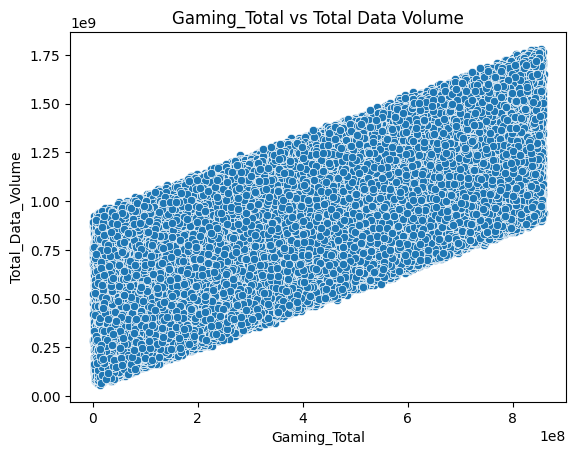

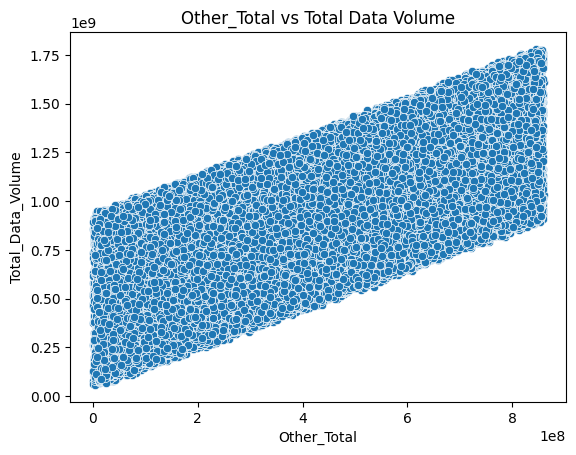

In [ ]:
#BIVARIATE ANALYSIS:-

apps = ['Social_Media_Total','Google_Total','Email_Total',
        'Youtube_Total','Netflix_Total','Gaming_Total','Other_Total']

for app in apps:
    sns.scatterplot(x=df[app], y=df['Total_Data_Volume'])
    plt.title(f"{app} vs Total Data Volume")
    plt.show()

In [ ]:
# DECILE SEGMENTATION :-

df['Duration_Decile'] = pd.qcut(df['Dur. (ms)'], 5, labels=False)

decile_summary = df.groupby('Duration_Decile')['Total_Data_Volume'].sum()
decile_summary

Duration_Decile
0.0    2.741432e+13
1.0    4.382107e+13
2.0    1.128717e+13
3.0    2.747894e+13
4.0    2.752827e+13
Name: Total_Data_Volume, dtype: float64

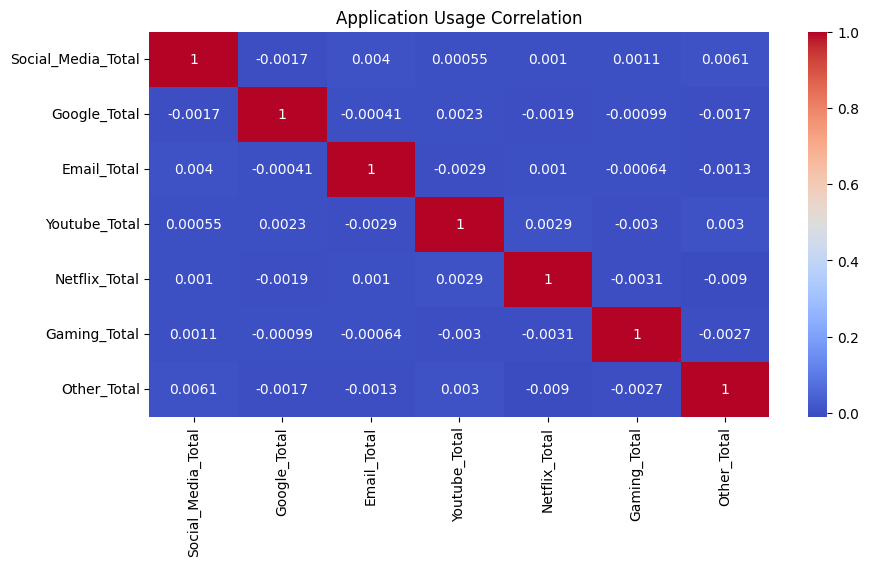

In [ ]:
# CORRELATION MATRIX : - 

plt.figure(figsize=(10,5))
sns.heatmap(df[apps].corr(), annot=True, cmap='coolwarm')
plt.title("Application Usage Correlation")
plt.show()

In [ ]:
# PCA : - 

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[apps])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.14435994 0.14375118]


In [ ]:
#2.0: AGGREGATE ENGAGEMENT METRICS : - 

engagement_df = df.groupby('MSISDN/Number').agg(
    session_frequency = ('Bearer Id', 'count'),
    total_duration_ms = ('Dur. (ms)', 'sum'),
    total_dl_bytes = ('Total DL (Bytes)', 'sum'),
    total_ul_bytes = ('Total UL (Bytes)', 'sum')
).reset_index()

engagement_df['total_traffic_bytes'] = (
    engagement_df['total_dl_bytes'] + engagement_df['total_ul_bytes']
)

engagement_df.head()

,MSISDN/Number,session_frequency,total_duration_ms,total_dl_bytes,total_ul_bytes,total_traffic_bytes
0,3.360301e+10,2,120325.0,559774090.0,82689008.0,642463098.0
1,3.360301e+10,1,135718.0,809319344.0,54693881.0,864013225.0
2,3.360301e+10,1,109906.0,73126355.0,49178027.0,122304382.0
3,3.360301e+10,1,135968.0,404238587.0,42532640.0,446771227.0
4,3.360301e+10,2,317851.0,663280757.0,121212483.0,784493240.0


In [ ]:
#2.1: TOP 10 USERS : - 

print("Top 10 by Session Frequency")
engagement_df.sort_values('session_frequency', ascending=False).head(10)

print("\nTop 10 by Total Duration")
engagement_df.sort_values('total_duration_ms', ascending=False).head(10)

print("\nTop 10 by Total Traffic")
engagement_df.sort_values('total_traffic_bytes', ascending=False).head(10)

Top 10 by Session Frequency

Top 10 by Total Duration

Top 10 by Total Traffic


,MSISDN/Number,session_frequency,total_duration_ms,total_dl_bytes,total_ul_bytes,total_traffic_bytes
89699,4.188282e+10,24060,2.271608e+09,1.091064e+13,9.918625e+11,1.190251e+13
5835,3.361489e+10,17,1.933331e+06,8.156743e+09,6.894830e+08,8.846226e+09
12578,3.362578e+10,17,1.890405e+06,7.770043e+09,7.295774e+08,8.499621e+09
12924,3.362632e+10,18,2.040353e+06,7.301517e+09,6.696507e+08,7.971167e+09
75761,3.367588e+10,15,1.927227e+06,7.309542e+09,5.815688e+08,7.891111e+09
36450,3.365973e+10,16,2.087574e+06,7.081602e+09,6.242603e+08,7.705863e+09
62426,3.366646e+10,11,1.332589e+06,6.903440e+09,4.050610e+08,7.308501e+09
56639,3.366471e+10,11,1.620071e+06,6.400774e+09,5.031905e+08,6.903964e+09
85853,3.369879e+10,11,1.234399e+06,6.010556e+09,5.303431e+08,6.540899e+09
30113,3.365836e+10,10,1.228062e+06,5.972303e+09,4.800945e+08,6.452398e+09


In [ ]:
#2.2: NORMALIZATION : - 

scaler = StandardScaler()

engagement_scaled = scaler.fit_transform(
    engagement_df[['session_frequency', 'total_duration_ms', 'total_traffic_bytes']]
)

# K-MEANS (k=3) : - 
kmeans_3 = KMeans(n_clusters=3, random_state=42)
engagement_df['engagement_cluster'] = kmeans_3.fit_predict(engagement_scaled)

engagement_df.head()

,MSISDN/Number,session_frequency,total_duration_ms,total_dl_bytes,total_ul_bytes,total_traffic_bytes,engagement_cluster
0,3.360301e+10,2,120325.0,559774090.0,82689008.0,642463098.0,0
1,3.360301e+10,1,135718.0,809319344.0,54693881.0,864013225.0,0
2,3.360301e+10,1,109906.0,73126355.0,49178027.0,122304382.0,0
3,3.360301e+10,1,135968.0,404238587.0,42532640.0,446771227.0,0
4,3.360301e+10,2,317851.0,663280757.0,121212483.0,784493240.0,0


In [ ]:
#2.3: CLUSTER SUMMARY : - 

cluster_summary = engagement_df.groupby('engagement_cluster').agg(
    min_sessions=('session_frequency', 'min'),
    max_sessions=('session_frequency', 'max'),
    avg_sessions=('session_frequency', 'mean'),
    
    min_duration=('total_duration_ms', 'min'),
    max_duration=('total_duration_ms', 'max'),
    avg_duration=('total_duration_ms', 'mean'),
    
    min_traffic=('total_traffic_bytes', 'min'),
    max_traffic=('total_traffic_bytes', 'max'),
    avg_traffic=('total_traffic_bytes', 'mean')
)

cluster_summary

,min_sessions,max_sessions,avg_sessions,min_duration,max_duration,avg_duration,min_traffic,max_traffic,avg_traffic
engagement_cluster,,,,,,,,,
0,0,4,1.207589,7.146000e+03,4.212950e+05,1.076316e+05,3.324901e+07,2.034468e+09,5.935201e+08
1,24060,24060,24060.000000,2.271608e+09,2.271608e+09,2.271608e+09,1.190251e+13,1.190251e+13,1.190251e+13
2,2,18,3.387725,6.659400e+04,2.087574e+06,3.695032e+05,2.881832e+08,8.846226e+09,1.768662e+09


In [ ]:
#2.4: TOP USERS PER APPLICATION: - 

app_columns = [
    'Social_Media_Total','Google_Total','Email_Total',
    'Youtube_Total','Netflix_Total','Gaming_Total','Other_Total'
]

for app in app_columns:
    print(f"\nTop 10 users for {app}")
    print(df.groupby('MSISDN/Number')[app].sum()
          .sort_values(ascending=False)
          .head(10))


Top 10 users for Social_Media_Total
MSISDN/Number
4.188282e+10    4.419916e+10
3.362632e+10    4.337478e+07
3.365973e+10    3.541236e+07
3.361489e+10    2.829454e+07
3.362578e+10    2.713550e+07
3.366716e+10    2.424785e+07
3.366907e+10    2.380083e+07
3.360313e+10    2.307782e+07
3.365849e+10    2.300007e+07
3.366553e+10    2.258603e+07
Name: Social_Media_Total, dtype: float64

Top 10 users for Google_Total
MSISDN/Number
4.188282e+10    1.885481e+11
3.362632e+10    1.521919e+08
3.362578e+10    1.423079e+08
3.361489e+10    1.279738e+08
3.365973e+10    1.165163e+08
3.367588e+10    1.098605e+08
3.366716e+10    1.050327e+08
3.369876e+10    9.193515e+07
3.365936e+10    9.104102e+07
3.369900e+10    9.098375e+07
Name: Google_Total, dtype: float64

Top 10 users for Email_Total
MSISDN/Number
4.188282e+10    5.467926e+10
3.362632e+10    4.241878e+07
3.361489e+10    4.078863e+07
3.362578e+10    4.063397e+07
3.365973e+10    3.599979e+07
3.367588e+10    3.151442e+07
3.366546e+10    3.041788e+07
3

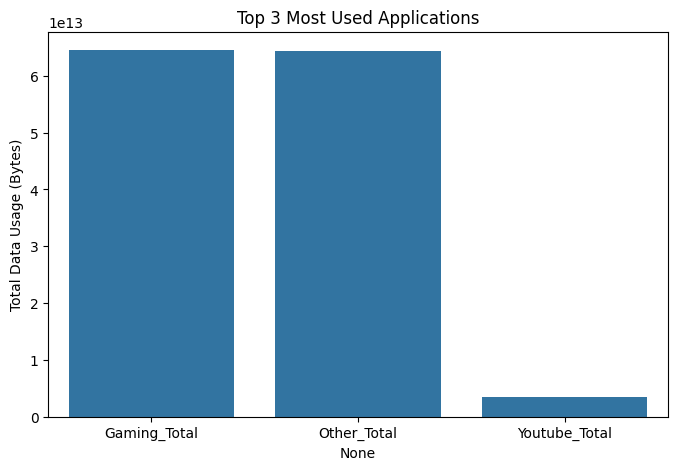

In [ ]:
#2.5: TOP 3 APPLICATIONS: - 

app_usage = df[app_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=app_usage.head(3).index, y=app_usage.head(3).values)
plt.title("Top 3 Most Used Applications")
plt.ylabel("Total Data Usage (Bytes)")
plt.show()

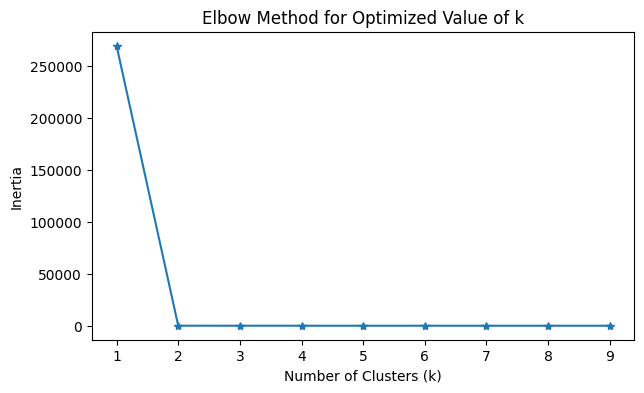

In [ ]:
#2.6: ELBOW METHOD: - 

inertia = []

for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(engagement_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(range(1,10), inertia, marker='*')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimized Value of k")
plt.show()

In [ ]:
#3: Experience Analytics : - 
#3.1.1: Handle Missing Values: -

experience_cols = [
    'TCP DL Retrans. Vol (Bytes)',
    'TCP UL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)',
    'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)'
]

# Numeric → mean
df[experience_cols] = df[experience_cols].fillna(
    df[experience_cols].mean()
)

# Categorical → mode
df['Handset Type'] = df['Handset Type'].fillna(
    df['Handset Type'].mode()[0]
)

In [ ]:
#3.1.2: Aggregate Experience Metrics:-
experience_df = df.groupby('MSISDN/Number').agg(
    avg_tcp_retrans = (
        'TCP DL Retrans. Vol (Bytes)',
        'mean'
    ),
    avg_rtt = (
        'Avg RTT DL (ms)',
        'mean'
    ),
    avg_throughput = (
        'Avg Bearer TP DL (kbps)',
        'mean'
    ),
    handset_type = ('Handset Type', lambda x: x.mode()[0])
).reset_index()

experience_df.head()

,MSISDN/Number,avg_tcp_retrans,avg_rtt,avg_throughput,handset_type
0,3.360301e+10,2.132141e+06,39.724036,3727.5,Samsung Galaxy Note 8 (Sm-N950F)
1,3.360301e+10,4.133035e+06,54.448072,6.0,Samsung Galaxy S7 (Sm-G930X)
2,3.360301e+10,4.133035e+06,20.000000,61.0,Apple iPhone X (A1901)
3,3.360301e+10,4.133035e+06,25.000000,23.0,Apple iPhone 7 (A1778)
4,3.360301e+10,4.133035e+06,46.000000,23.0,Apple iPhone 6S (A1688)


In [ ]:
#3.2: List 10 of the Top, Bottom & Frequent Values:-

def top_bottom_frequent(series, name):
    print(f"\n{name} - Top 10")
    print(series.sort_values(ascending=False).head(10))
    
    print(f"\n{name} - Bottom 10")
    print(series.sort_values().head(10))
    
    print(f"\n{name} - Most Frequent")
    print(series.value_counts().head(10))

top_bottom_frequent(df['TCP DL Retrans. Vol (Bytes)'], "TCP Retransmission")
top_bottom_frequent(df['Avg RTT DL (ms)'], "RTT")
top_bottom_frequent(df['Avg Bearer TP DL (kbps)'], "Throughput")


TCP Retransmission - Top 10
3698      2.080991e+07
66687     2.080991e+07
139846    2.080991e+07
149935    2.080991e+07
51394     2.080991e+07
139832    2.080991e+07
139833    2.080991e+07
66688     2.080991e+07
40778     2.080991e+07
144673    2.080991e+07
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

TCP Retransmission - Bottom 10
59708     2.0
125088    2.0
143707    4.0
100305    4.0
39582     4.0
52480     4.0
143429    4.0
60366     4.0
75082     4.0
60417     4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

TCP Retransmission - Most Frequent
TCP DL Retrans. Vol (Bytes)
4.133035e+06    88146
2.080991e+07     8952
1.330000e+03      433
2.660000e+03      219
3.800000e+01      200
9.200000e+01      192
1.318000e+03      156
5.430000e+02      133
3.990000e+03      114
7.600000e+01      108
Name: count, dtype: int64

RTT - Top 10
103193    127.0
1873      127.0
19529     127.0
19387     127.0
71797     127.0
24237     127.0
98864     127.0
13555     127.0
108085    127.0
1

In [ ]:
#3.2.1: Throughput By Handset:-

# Select top 10 handset types to avoid clutter
top_handsets = (
    experience_df['handset_type']
    .value_counts()
    .head(10)
    .index
)

filtered_exp = experience_df[
    experience_df['handset_type'].isin(top_handsets)
]

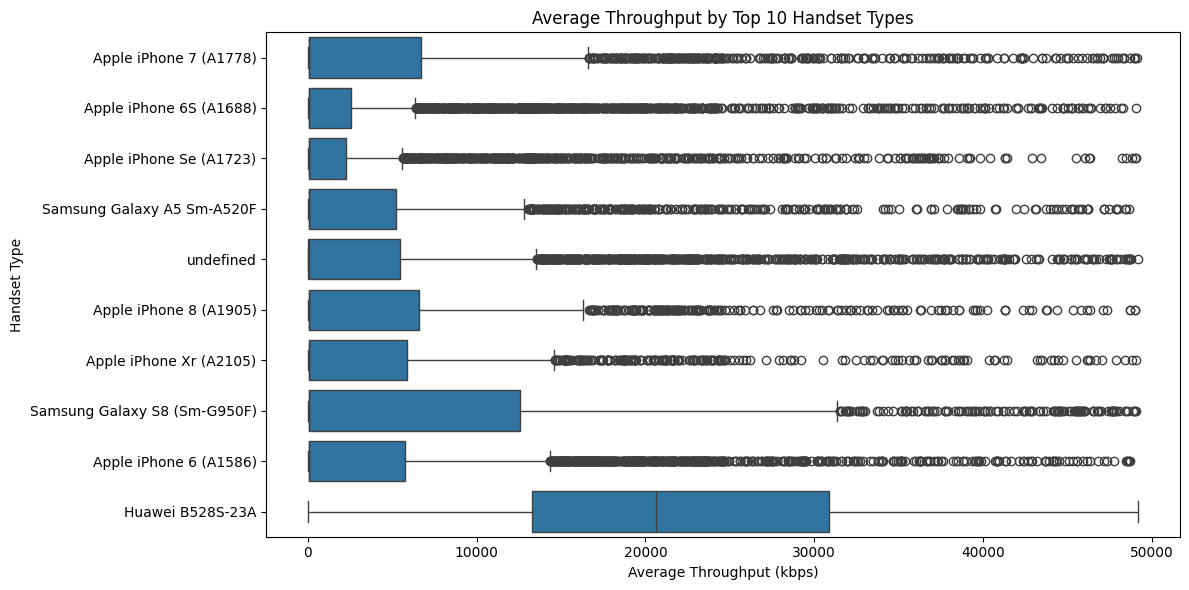

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=filtered_exp,
    y='handset_type',
    x='avg_throughput',
    orient='h'
)

plt.title("Average Throughput by Top 10 Handset Types")
plt.xlabel("Average Throughput (kbps)")
plt.ylabel("Handset Type")
plt.tight_layout()
plt.show()

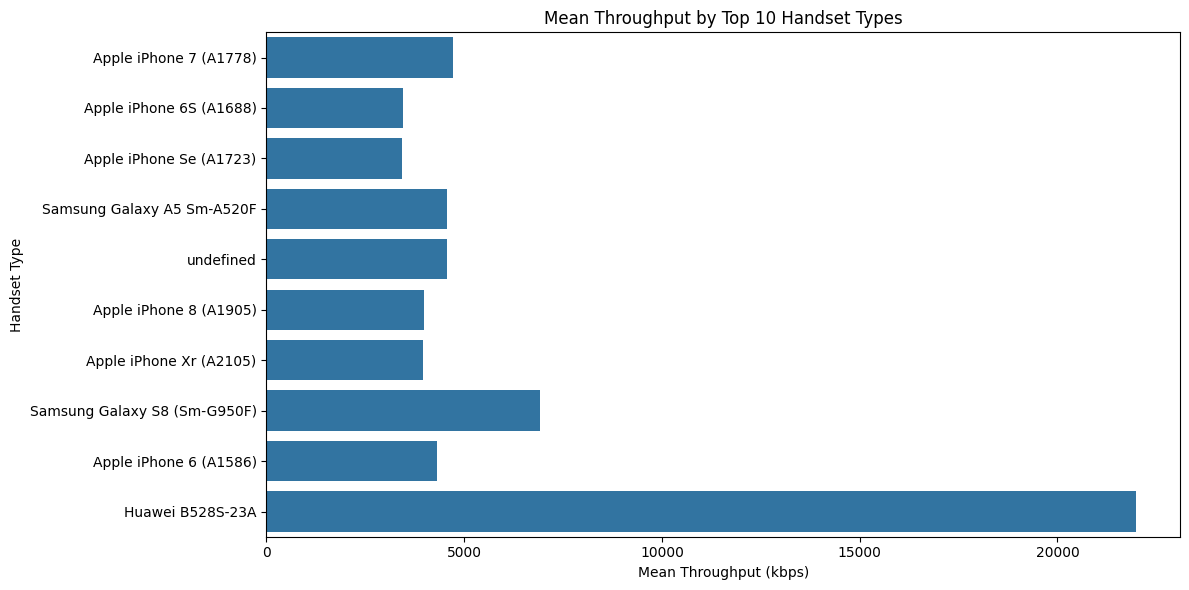

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data=filtered_exp,
    y='handset_type',
    x='avg_throughput',
    estimator=np.mean,
    errorbar=None
)

plt.title("Mean Throughput by Top 10 Handset Types")
plt.xlabel("Mean Throughput (kbps)")
plt.ylabel("Handset Type")
plt.tight_layout()
plt.show()

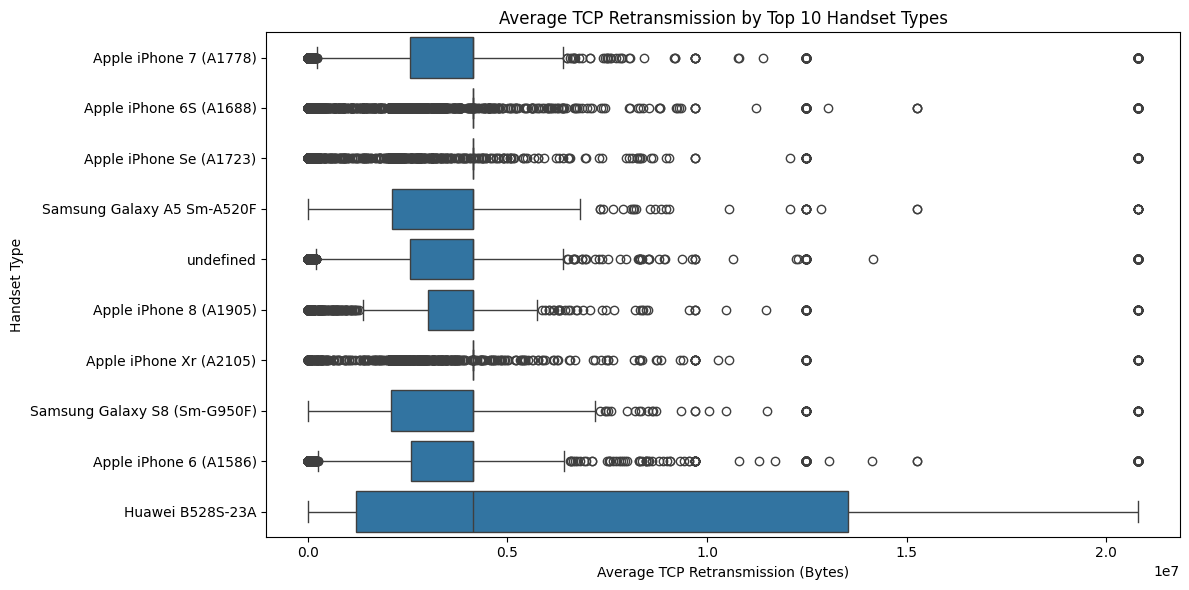

In [ ]:
#3.2.2: Throughput By Handset:-

# Reuse top 10 handset types selected earlier:-
filtered_exp = experience_df[
    experience_df['handset_type'].isin(top_handsets)
]

plt.figure(figsize=(12, 6))

sns.boxplot(
    data=filtered_exp,
    y='handset_type',
    x='avg_tcp_retrans',
    orient='h'
)

plt.title("Average TCP Retransmission by Top 10 Handset Types")
plt.xlabel("Average TCP Retransmission (Bytes)")
plt.ylabel("Handset Type")
plt.tight_layout()
plt.show()

In [ ]:
#3.4.1: Experience Clustering:-

scaler = StandardScaler()

experience_scaled = scaler.fit_transform(
    experience_df[['avg_tcp_retrans', 'avg_rtt', 'avg_throughput']]
)

kmeans_exp = KMeans(n_clusters=3, random_state=42)
experience_df['experience_cluster'] = kmeans_exp.fit_predict(experience_scaled)

experience_df.head()

,MSISDN/Number,avg_tcp_retrans,avg_rtt,avg_throughput,handset_type,experience_cluster
0,3.360301e+10,2.132141e+06,39.724036,3727.5,Samsung Galaxy Note 8 (Sm-N950F),1
1,3.360301e+10,4.133035e+06,54.448072,6.0,Samsung Galaxy S7 (Sm-G930X),1
2,3.360301e+10,4.133035e+06,20.000000,61.0,Apple iPhone X (A1901),1
3,3.360301e+10,4.133035e+06,25.000000,23.0,Apple iPhone 7 (A1778),1
4,3.360301e+10,4.133035e+06,46.000000,23.0,Apple iPhone 6S (A1688),1


In [ ]:
#3.4.2: Cluster Summary:-

experience_cluster_summary = (
    experience_df
    .groupby('experience_cluster')
    .mean(numeric_only=True)
)
experience_cluster_summary

,MSISDN/Number,avg_tcp_retrans,avg_rtt,avg_throughput
experience_cluster,,,,
0,3.365884e+10,1.916439e+06,79.554648,17991.183600
1,3.365676e+10,3.595245e+06,42.912738,2084.106642
2,3.366315e+10,1.865714e+07,83.597622,20967.707841


In [ ]:
#4.1.1: Identify Least Engaged Cluster: - 

engagement_cluster_means = (
    engagement_df
    .groupby('engagement_cluster')[[
        'session_frequency',
        'total_duration_ms',
        'total_traffic_bytes'
    ]]
    .mean()
)

engagement_cluster_means

,session_frequency,total_duration_ms,total_traffic_bytes
engagement_cluster,,,
0,1.207589,1.076316e+05,5.935201e+08
1,24060.000000,2.271608e+09,1.190251e+13
2,3.387725,3.695032e+05,1.768662e+09


In [ ]:
# Least engaged cluster = minimum total traffic
least_engaged_cluster = (
    engagement_cluster_means['total_traffic_bytes']
    .idxmin()
)

least_engaged_cluster

np.int32(0)

In [ ]:
#4.1.2: Engagement Score: - 

least_engaged_center = kmeans_3.cluster_centers_[least_engaged_cluster]

engagement_df['engagement_score'] = np.linalg.norm(
    engagement_scaled - least_engaged_center,
    axis=1
)
engagement_df.head()

,MSISDN/Number,session_frequency,total_duration_ms,total_dl_bytes,total_ul_bytes,total_traffic_bytes,engagement_cluster,engagement_score
0,3.360301e+10,2,120325.0,559774090.0,82689008.0,642463098.0,0,0.009813
1,3.360301e+10,1,135718.0,809319344.0,54693881.0,864013225.0,0,0.007901
2,3.360301e+10,1,109906.0,73126355.0,49178027.0,122304382.0,0,0.012408
3,3.360301e+10,1,135968.0,404238587.0,42532640.0,446771227.0,0,0.005907
4,3.360301e+10,2,317851.0,663280757.0,121212483.0,784493240.0,0,0.029417


In [ ]:
#4.2.1: Worst Experience Cluster: - 

experience_cluster_means = (
    experience_df
    .groupby('experience_cluster')[[
        'avg_tcp_retrans',
        'avg_rtt',
        'avg_throughput'
    ]]
    .mean()
)

experience_cluster_means

,avg_tcp_retrans,avg_rtt,avg_throughput
experience_cluster,,,
0,1.916439e+06,79.554648,17991.183600
1,3.595245e+06,42.912738,2084.106642
2,1.865714e+07,83.597622,20967.707841


In [ ]:
# Worst experience: high RTT & retransmission, low throughput
worst_experience_cluster = (
    experience_cluster_means['avg_throughput']
    .idxmin()
)

worst_experience_cluster

np.int32(1)

In [ ]:
#4.2.2: Experience Score: - 

worst_exp_center = kmeans_exp.cluster_centers_[worst_experience_cluster]

experience_df['experience_score'] = np.linalg.norm(
    experience_scaled - worst_exp_center,
    axis=1
)

experience_df.head()

,MSISDN/Number,avg_tcp_retrans,avg_rtt,avg_throughput,handset_type,experience_cluster,experience_score
0,3.360301e+10,2.132141e+06,39.724036,3727.5,Samsung Galaxy Note 8 (Sm-N950F),1,0.415376
1,3.360301e+10,4.133035e+06,54.448072,6.0,Samsung Galaxy S7 (Sm-G930X),1,0.505577
2,3.360301e+10,4.133035e+06,20.000000,61.0,Apple iPhone X (A1901),1,0.920666
3,3.360301e+10,4.133035e+06,25.000000,23.0,Apple iPhone 7 (A1778),1,0.734689
4,3.360301e+10,4.133035e+06,46.000000,23.0,Apple iPhone 6S (A1688),1,0.260941


In [ ]:
#4.3: Satisfaction Score: -
satisfaction_df = (
    engagement_df[['MSISDN/Number', 'engagement_score']]
    .merge(
        experience_df[['MSISDN/Number', 'experience_score']],
        on='MSISDN/Number'
    )
)

satisfaction_df['satisfaction_score'] = (
    satisfaction_df['engagement_score'] +
    satisfaction_df['experience_score']
) / 2

satisfaction_df.head()

,MSISDN/Number,engagement_score,experience_score,satisfaction_score
0,3.360301e+10,0.009813,0.415376,0.212595
1,3.360301e+10,0.007901,0.505577,0.256739
2,3.360301e+10,0.012408,0.920666,0.466537
3,3.360301e+10,0.005907,0.734689,0.370298
4,3.360301e+10,0.029417,0.260941,0.145179


In [ ]:
# Data For ML:-

X = satisfaction_df[['engagement_score', 'experience_score']]
y = satisfaction_df['satisfaction_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Model Comparison:-

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append([name, rmse, r2])

results_df = pd.DataFrame(
    results,
    columns=['Model', 'RMSE', 'R2 Score']
)

results_df = results_df.sort_values('RMSE')
results_df

,Model,RMSE,R2 Score
0,Linear Regression,8.446297e-15,1.000000
1,Ridge Regression,1.109476e-01,0.997019
3,Decision Tree,1.935639e+00,0.092551
4,Random Forest,1.935697e+00,0.092497
2,Lasso Regression,2.032039e+00,-0.000087


In [ ]:
#Final Model:-

final_model = LinearRegression()
final_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#4.4: K-MEANS (k=2):-

score_scaled = scaler.fit_transform(
    satisfaction_df[['engagement_score', 'experience_score']]
)

kmeans_score = KMeans(n_clusters=2, random_state=42)
satisfaction_df['score_cluster'] = kmeans_score.fit_predict(score_scaled)

satisfaction_df.groupby('score_cluster')[[
    'satisfaction_score',
    'experience_score'
]].mean()

,satisfaction_score,experience_score
score_cluster,,
0,0.686926,1.358819
1,259.733962,0.750536


In [ ]:
# Final Export Table:-

final_table = satisfaction_df.merge(
    engagement_df[['MSISDN/Number', 'engagement_cluster']],
    on='MSISDN/Number'
).merge(
    experience_df[['MSISDN/Number', 'experience_cluster']],
    on='MSISDN/Number'
)

final_table.head()

,MSISDN/Number,engagement_score,experience_score,satisfaction_score,score_cluster,engagement_cluster,experience_cluster
0,3.360301e+10,0.009813,0.415376,0.212595,0,0,1
1,3.360301e+10,0.007901,0.505577,0.256739,0,0,1
2,3.360301e+10,0.012408,0.920666,0.466537,0,0,1
3,3.360301e+10,0.005907,0.734689,0.370298,0,0,1
4,3.360301e+10,0.029417,0.260941,0.145179,0,0,1


In [ ]:
# Export to SQL:-

import sys
!{sys.executable} -m pip install sqlalchemy pymysql cryptography mysql-connector-python

In [ ]:
# Final Table For SQL Export : - 

final_table = satisfaction_df.merge(
    engagement_df[['MSISDN/Number', 'engagement_cluster']],
    on='MSISDN/Number'
).merge(
    experience_df[['MSISDN/Number', 'experience_cluster']],
    on='MSISDN/Number'
)

final_table.head()

,MSISDN/Number,engagement_score,experience_score,satisfaction_score,score_cluster,engagement_cluster,experience_cluster
0,3.360301e+10,0.009813,0.415376,0.212595,0,0,1
1,3.360301e+10,0.007901,0.505577,0.256739,0,0,1
2,3.360301e+10,0.012408,0.920666,0.466537,0,0,1
3,3.360301e+10,0.005907,0.734689,0.370298,0,0,1
4,3.360301e+10,0.029417,0.260941,0.145179,0,0,1


In [ ]:
# Define SQL Server connection details: - 
server = 'HP\MSSQLSERVER01'  # The name of your server
database = 'master'  # The database you want to connect to

# Create a connection string with a trusted connection
connection_url = f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"

# Create an engine
engine = create_engine(connection_url)

# Transfer data to SQL Server
table_name = 'telcom_data.csv'
df.to_sql(table_name, engine, if_exists='replace', index=False)

# Confirm completion
print(f"Dataset transferred to SQL Server table: {table_name}")

# Dispose the engine
engine.dispose()

print("Final table exported to MySQL successfully")

Dataset transferred to SQL Server table: telcom_data.csv
Final table exported to MySQL successfully


In [ ]:
END Thank You